<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/4105HW4SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Vishy Adusumilli
#801185663
#HW 4 Problem 1
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/Datasets/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [96]:

dataset["diagnosis"] = dataset["diagnosis"].map({'M':1, 'B':0})
y = dataset.iloc[:, 1]
x = dataset.iloc[:, range(2,31)]

np.random.seed(0)
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = .8, test_size = 0.2, random_state = 0)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [97]:
kvals = range(1,30)
accuracyvals = []
precisionvals = []
recallvals = []

for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svcmodel = SVC(C = 1)
  svcmodel.fit(trainpca, y_train)
  prediction = svcmodel.predict(testpca)

  accuracyvals.append(metrics.accuracy_score(y_test, prediction))
  precisionvals.append(metrics.precision_score(y_test, prediction))
  recallvals.append(metrics.recall_score(y_test, prediction))


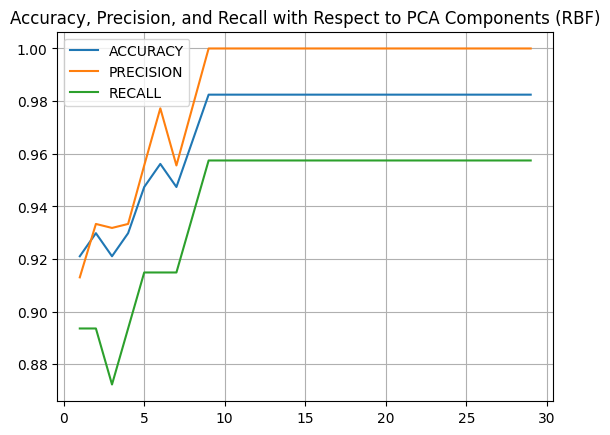

In [98]:
plt.plot(kvals, accuracyvals, label = 'ACCURACY')
plt.plot(kvals, precisionvals, label = 'PRECISION')
plt.plot(kvals, recallvals, label = 'RECALL')
plt.title("Accuracy, Precision, and Recall with Respect to PCA Components (RBF)")
plt.legend()
plt.grid()


In [99]:
accuracyvals = []
precisionvals = []
recallvals = []
for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svcmodel = SVC(kernel = 'linear', C = 1)
  svcmodel.fit(trainpca, y_train)
  prediction = svcmodel.predict(testpca)

  accuracyvals.append(metrics.accuracy_score(y_test, prediction))
  precisionvals.append(metrics.precision_score(y_test, prediction))
  recallvals.append(metrics.recall_score(y_test, prediction))

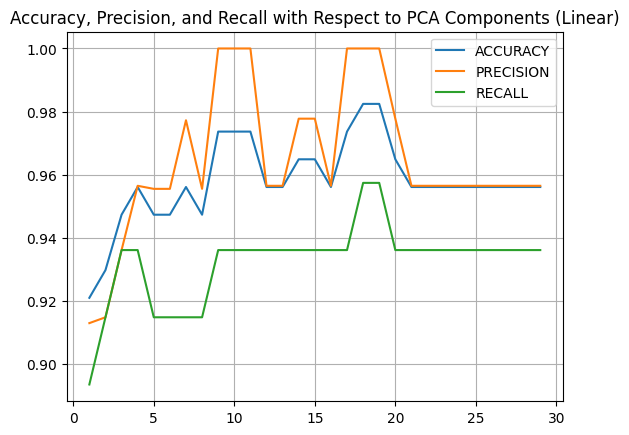

In [100]:
plt.plot(kvals, accuracyvals, label = 'ACCURACY')
plt.plot(kvals, precisionvals, label = 'PRECISION')
plt.plot(kvals, recallvals, label = 'RECALL')
plt.title("Accuracy, Precision, and Recall with Respect to PCA Components (Linear)")
plt.legend()
plt.grid()

In [101]:
accuracyvals = []
precisionvals = []
recallvals = []
for k in kvals:
  pca = PCA(n_components = k)
  trainpca = pca.fit_transform(x_train)
  testpca = pca.transform(x_test)

  svcmodel = SVC(kernel = 'sigmoid', C = 1)
  svcmodel.fit(trainpca, y_train)
  prediction = svcmodel.predict(testpca)

  accuracyvals.append(metrics.accuracy_score(y_test, prediction))
  precisionvals.append(metrics.precision_score(y_test, prediction))
  recallvals.append(metrics.recall_score(y_test, prediction))

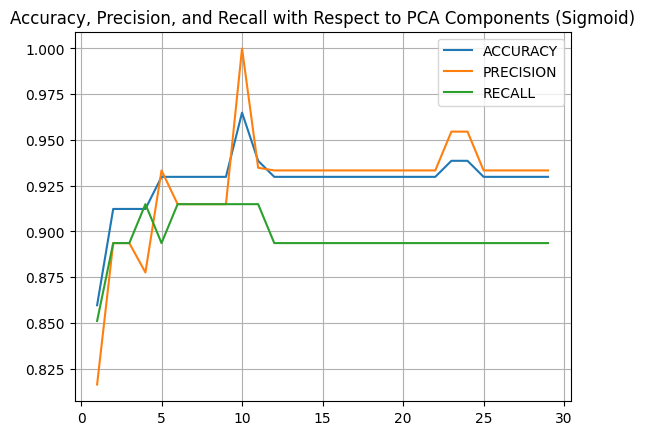

In [102]:
plt.plot(kvals, accuracyvals, label = 'ACCURACY')
plt.plot(kvals, precisionvals, label = 'PRECISION')
plt.plot(kvals, recallvals, label = 'RECALL')
plt.title("Accuracy, Precision, and Recall with Respect to PCA Components (Sigmoid)")
plt.legend()
plt.grid()